<a href="https://colab.research.google.com/github/hannahbrijit/AmatuerDataQuest/blob/master/Mushrooms_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Encode labels
from sklearn import preprocessing

In [ ]:
#Reading the Dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mushrooms.csv")

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
data=df.drop(['veil-type'],axis=1)
#dropping because there's only 1 'unique value'.

In [ ]:
#since we've got categorical variables, we have to encode the labels.
encoder = preprocessing.LabelEncoder()
data = data.apply(encoder.fit_transform)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1


In [ ]:
y = data["class"].values #generating dependent variable vector
X = data.drop(["class"],axis=1)#generating matrix of features

In [ ]:
y=pd.get_dummies(y).values

In [ ]:
# splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=42)

In [ ]:
# parameters of the neural network
learning_rate = 0.3
epochs = 1000
n_input = 21
n_hidden_1 = 10
n_hidden_2 = 10
n_output = 2
N = y.size
np.random.seed(10)
weights_1 = np.random.normal(scale=0.5, size=(n_input, n_hidden_1))
weights_2 = np.random.normal(scale=0.5, size=(n_hidden_1, n_hidden_2))
weights_3 = np.random.normal(scale=0.5, size=(n_hidden_2, n_output))

In [ ]:
# visualize the neural network
!pip install requests


In [ ]:
import requests
url="https://raw.githubusercontent.com/jzliu-100/visualize-neural-network/master/VisualizeNN.py"
r=requests.get(url)

with open ('VisualizeNN.py', 'w') as f:
  f.write(r.text)

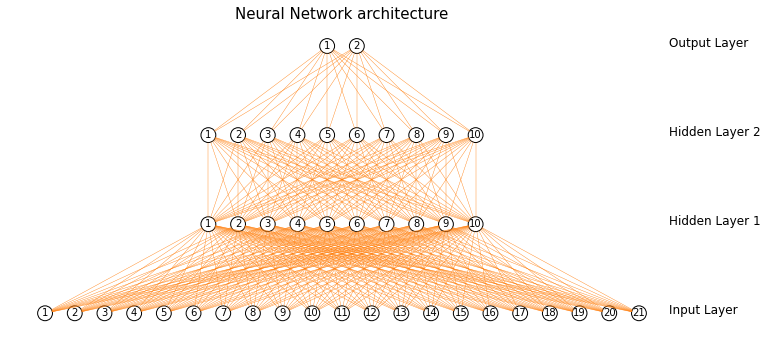

In [ ]:
# visualize the neural network
import VisualizeNN as VisNN
network=VisNN.DrawNN([n_input,n_hidden_1,n_hidden_2,n_output])
network.draw()

In [ ]:
# required functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(predictions, labels):
    N = labels.size
    mse = ((predictions - labels)**2).sum() / (2*N)
    return mse

def accuracy(predictions, labels):
    predicions_correct = predictions.argmax(axis=1) == labels.argmax(axis=1)
    accuracy = predicions_correct.mean()
    return accuracy

In [ ]:
# training the neural net
monitoring = {"mean_squared_error": [], "accuracy": []}
for epoch in range(epochs):

    # feedforward
    hidden_layer_inputs_1 = np.dot(x_train, weights_1)
    hidden_layer_outputs_1 = sigmoid(hidden_layer_inputs_1)

    hidden_layer_inputs_2 = np.dot(hidden_layer_outputs_1, weights_2)
    hidden_layer_outputs_2 = sigmoid(hidden_layer_inputs_2)

    output_layer_inputs = np.dot(hidden_layer_outputs_2, weights_3)
    output_layer_outputs = sigmoid(output_layer_inputs)


    # monitor training process
    mse = mean_squared_error(output_layer_outputs, y_train)
    acc = accuracy(output_layer_outputs, y_train)

    monitoring["mean_squared_error"].append(mse)
    monitoring["accuracy"].append(acc)


    # backpropagation
    output_layer_error = output_layer_outputs - y_train
    output_layer_delta = output_layer_error * output_layer_outputs * (1 - output_layer_outputs)

    hidden_layer_error_2 = np.dot(output_layer_delta, weights_3.T)
    hidden_layer_delta_2 = hidden_layer_error_2 * hidden_layer_outputs_2 * (1 - hidden_layer_outputs_2)

    hidden_layer_error_1 = np.dot(hidden_layer_delta_2, weights_2.T)
    hidden_layer_delta_1 = hidden_layer_error_1 * hidden_layer_outputs_1 * (1 - hidden_layer_outputs_1)


    # weight updates
    weights_3_update = np.dot(hidden_layer_outputs_2.T, output_layer_delta) / N
    weights_2_update = np.dot(hidden_layer_outputs_1.T, hidden_layer_delta_2) / N
    weights_1_update = np.dot(x_train.T, hidden_layer_delta_1) / N

    weights_3 = weights_3 - learning_rate * weights_3_update
    weights_2 = weights_2 - learning_rate * weights_2_update
    weights_1 = weights_1 - learning_rate * weights_1_update

monitoring_df = pd.DataFrame(monitoring)

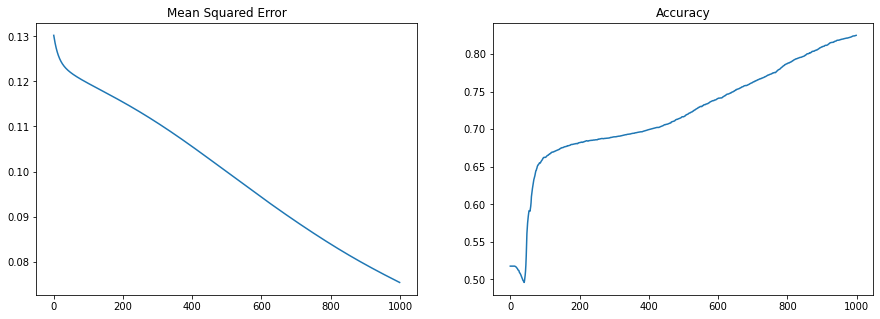

In [ ]:
# plotting MSE and Accuracy
fig, axes = plt.subplots(1, 2, figsize=(15,5))

monitoring_df.mean_squared_error.plot(ax=axes[0], title="Mean Squared Error")
monitoring_df.accuracy.plot(ax=axes[1], title="Accuracy");

In [ ]:
# feedforward with test data and check accuracy
hidden_layer_inputs_1 = np.dot(x_test, weights_1)
hidden_layer_outputs_1 = sigmoid(hidden_layer_inputs_1)

hidden_layer_inputs_2 = np.dot(hidden_layer_outputs_1, weights_2)
hidden_layer_outputs_2 = sigmoid(hidden_layer_inputs_2)

output_layer_inputs = np.dot(hidden_layer_outputs_2, weights_3)
output_layer_outputs = sigmoid(output_layer_inputs)
acc = accuracy(output_layer_outputs, y_test)
print(f"Accuracy: {acc}")

Accuracy: 0.9
